<a href="https://colab.research.google.com/github/DSYMaO/STA365/blob/main/STA365_HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt; import pymc as pm;
import pandas as pd; import io


In [4]:
from google.colab import files

uploaded = files.upload()


Saving Maths.csv to Maths.csv


From Kaggle: https://www.kaggle.com/datasets/whenamancodes/student-performance/data

In [5]:
df = pd.read_csv(io.BytesIO(uploaded['Maths.csv']))
print(df)


    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   
395     GP   F   18       U     GT3       A     4     4   at_home   teacher   
396     MS   M   19       R     GT3       T     1     1     other  services   

     ... famrel freetime  goout  Dalc  Walc health 

In [7]:
X = np.array(df['G1'])
Y = np.array(df['G2'])
temp = np.array([X, Y])


1)

In [15]:
with pm.Model() as MLR:
    betas = pm.MvNormal('betas', mu=X.mean(), cov=np.cov(temp, bias=True), shape=10)
    sigma = pm.TruncatedNormal('sigma', mu=1, sigma=1, lower=0) # half normal
    y = pm.Normal('y', mu=pm.math.dot(X, betas), sigma=sigma, observed=X)

with MLR:
    idata = pm.sample()

ValueError: Incompatible Elemwise input shapes [(2,), (397,)]

2) The halfnormal distribution feels right to use. But I was unable to figure out how to make it such that the matrix nxp match together. I believe it was the incorrect dimensions of my means matrix?
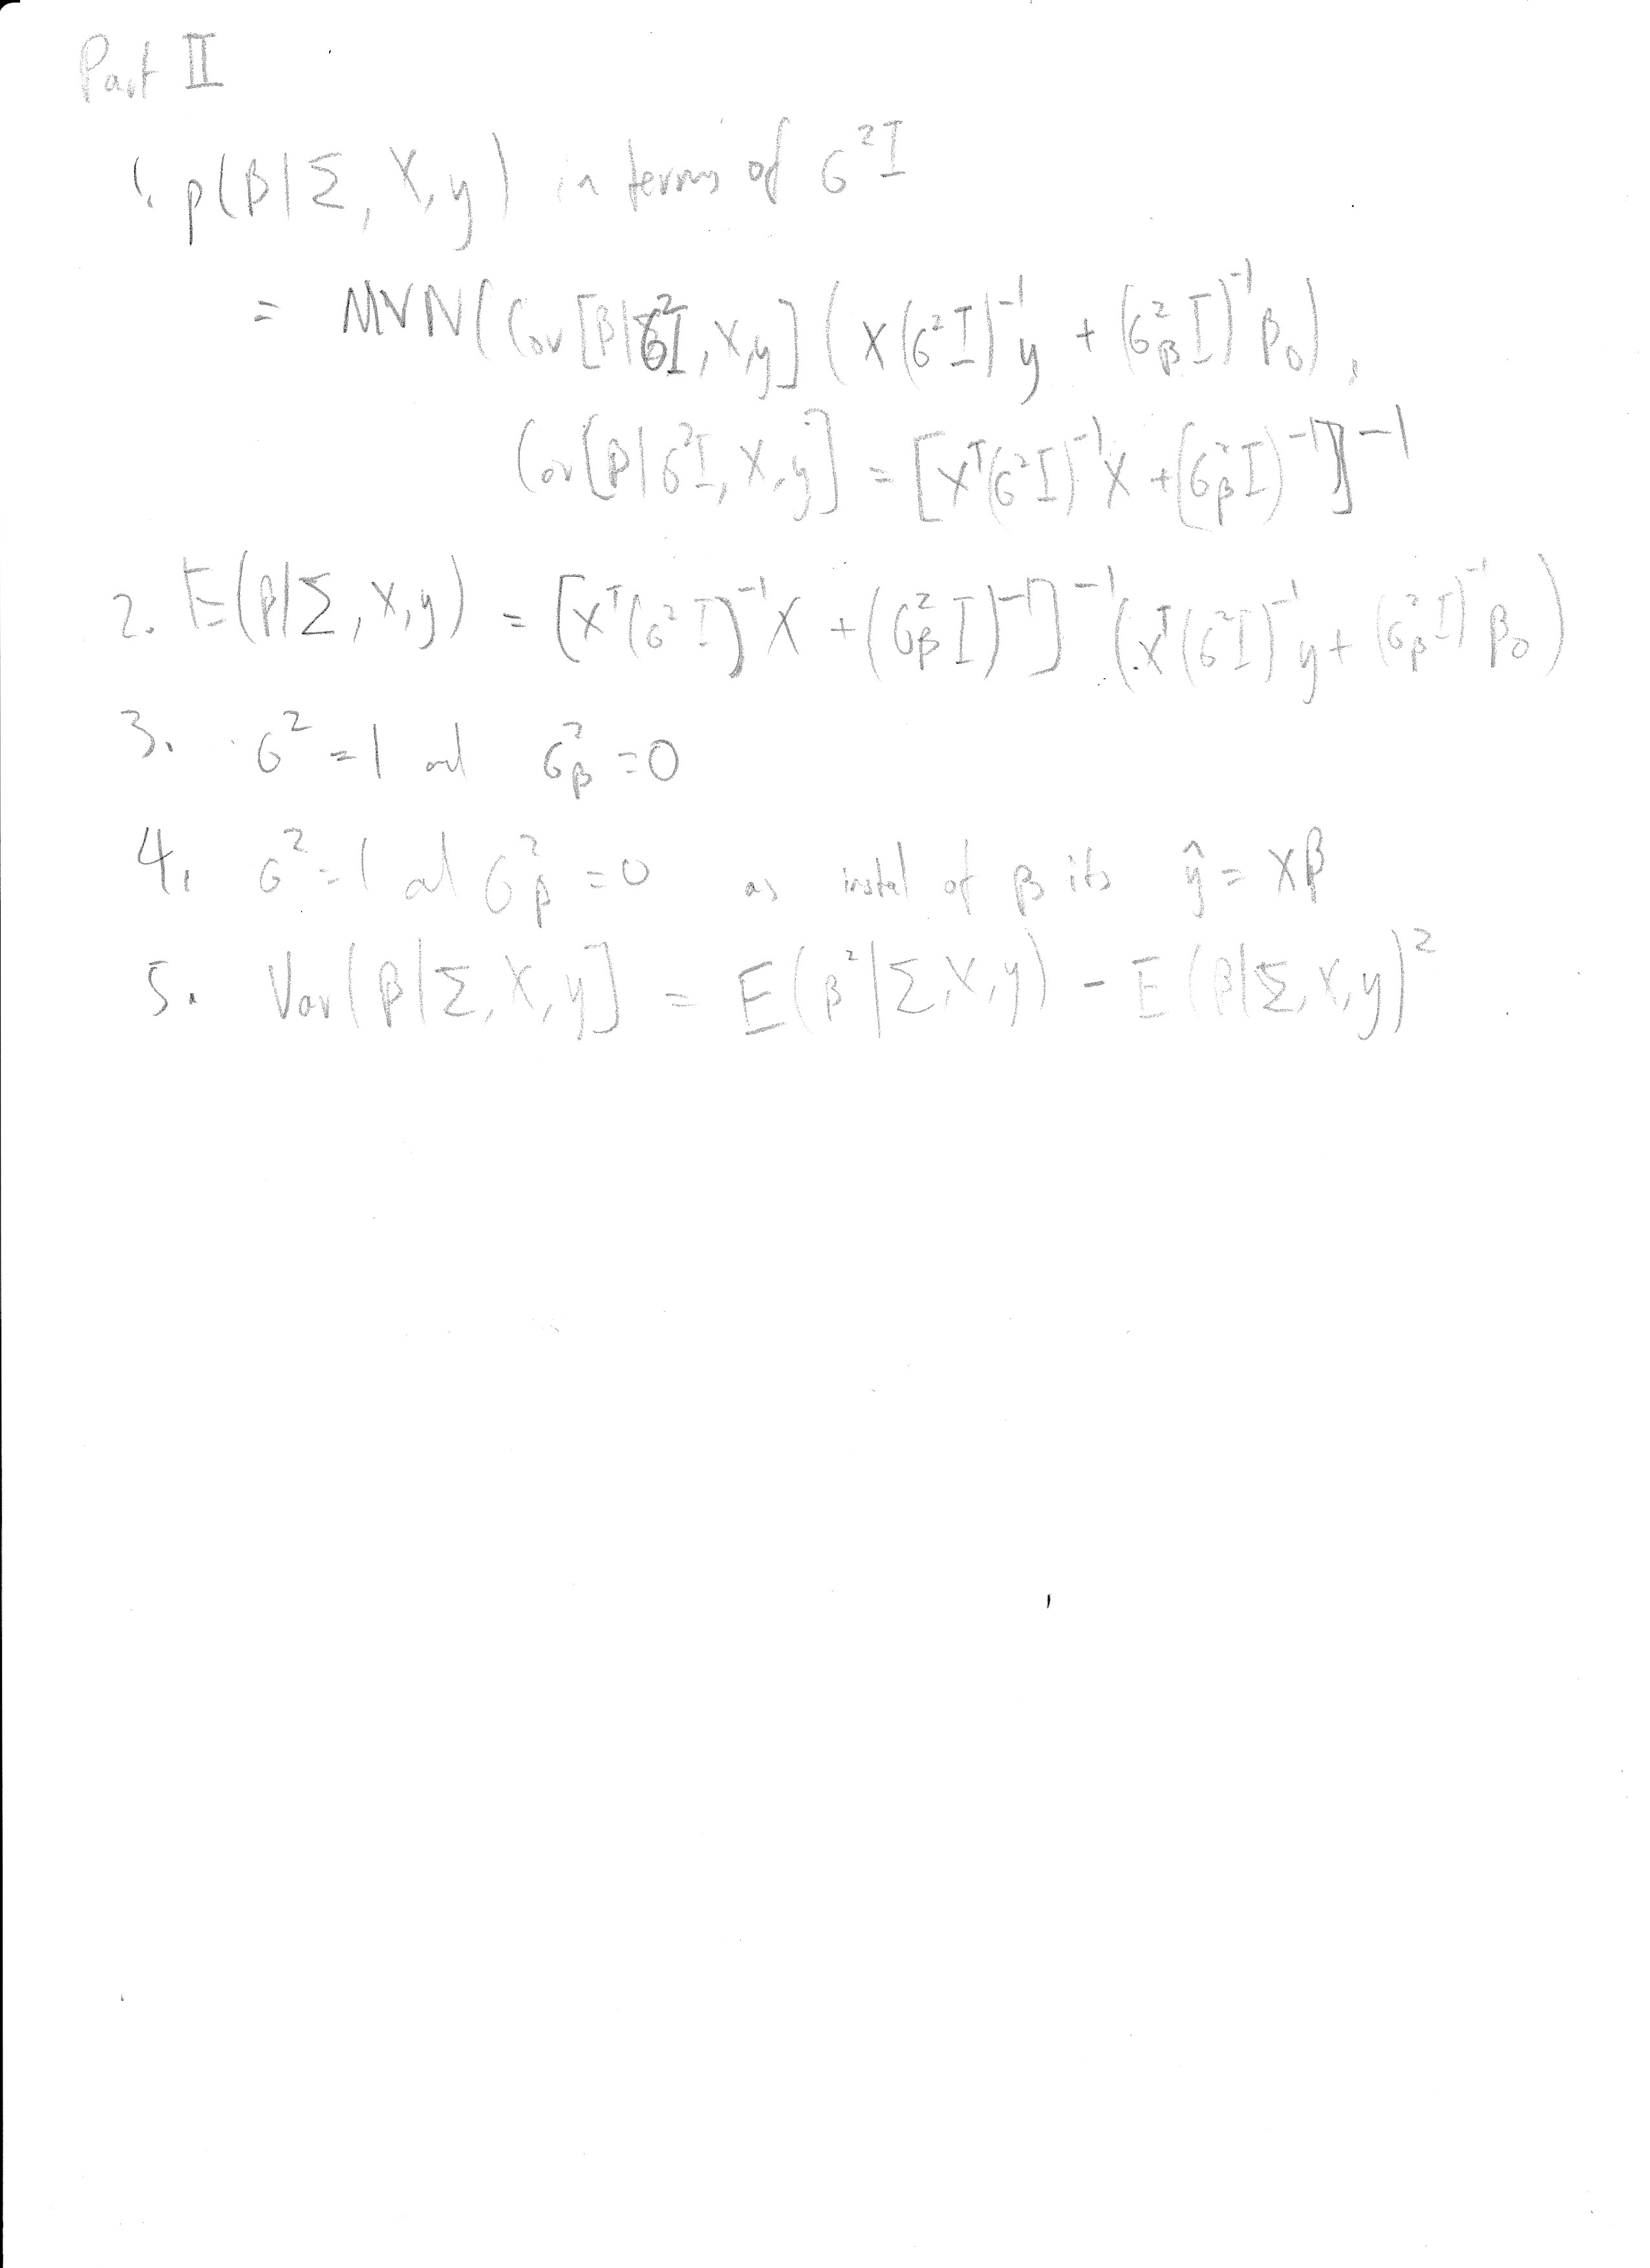

In [14]:
import numpy as np; from scipy import stats
X = np.array(df['G1'])
Y = np.array(df['G2'])

with pm.Model() as MNV_LKJ:
    packed_L = pm.LKJCholeskyCov("packed_L", n=10, eta=2.0,
                                 sd_dist=pm.Exponential.dist(1.0, shape=2), compute_corr=False)
    L = pm.expand_packed_triangular(10, packed_L)
    # Sigma = pm.Deterministic('Sigma', L.dot(L.T)) # Don't use a covariance matrix parameterization
    mu = pm.MvNormal('mu', mu=X.mean(), cov=np.cov(temp, bias=True), shape=10);
    # y = pm.MvNormal('y', mu=mu, cov=Sigma, shape=(n,1), observed=y)
    # Figure out how to parameterize this with a Cholesky factor to improve computational efficiency
with MNV_LKJ:
    idata = pm.sample()

The current values work, I have attempd to cange values related to mu and cov and It would just result in an error

: